# Logistic Regression and SVM Mini-Lab
 By Saqib Shah, Phu Truong and Mrinmoy Bhaumik

### Importing all the important libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### We are taking the preprocessed data from the lab one.

<img src='income_data.png'>

In [2]:
pd.options.display.max_columns = None

Note: This dataset has been processed from our lab one. Some of the important changes to notice:  
-remove and impute missing values  
-create dummy variables for attributes: workclass, marital_status, occupation, relationship, race.  
-separate attribute 'native_country' into 2 dummy variables: Others vs. United-states

In [4]:
%%time

data = pd.read_csv('preprocessed_income_dataset.csv')
data.head()

Wall time: 216 ms


,age,education_num,sex,hours_per_week,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,marital_status:Divorced,marital_status:Married-AF-spouse,marital_status:Married-civ-spouse,marital_status:Married-spouse-absent,marital_status:Never-married,marital_status:Separated,marital_status:Widowed,occupation:Adm-clerical,occupation:Armed-Forces,occupation:Craft-repair,occupation:Exec-managerial,occupation:Farming-fishing,occupation:Handlers-cleaners,occupation:Machine-op-inspct,occupation:Other-service,occupation:Priv-house-serv,occupation:Prof-specialty,occupation:Protective-serv,occupation:Sales,occupation:Tech-support,occupation:Transport-moving,relationship:Husband,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native_country:Others,native_country:United-States,income
0,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,54,4,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,41,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,34,9,0,45,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,38,6,1,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [5]:
data.columns

Index(['age', 'education_num', 'sex', 'hours_per_week',
       'workclass:Federal-gov', 'workclass:Local-gov',
       'workclass:Never-worked', 'workclass:Private', 'workclass:Self-emp-inc',
       'workclass:Self-emp-not-inc', 'workclass:State-gov',
       'workclass:Without-pay', 'marital_status:Divorced',
       'marital_status:Married-AF-spouse', 'marital_status:Married-civ-spouse',
       'marital_status:Married-spouse-absent', 'marital_status:Never-married',
       'marital_status:Separated', 'marital_status:Widowed',
       'occupation:Adm-clerical', 'occupation:Armed-Forces',
       'occupation:Craft-repair', 'occupation:Exec-managerial',
       'occupation:Farming-fishing', 'occupation:Handlers-cleaners',
       'occupation:Machine-op-inspct', 'occupation:Other-service',
       'occupation:Priv-house-serv', 'occupation:Prof-specialty',
       'occupation:Protective-serv', 'occupation:Sales',
       'occupation:Tech-support', 'occupation:Transport-moving',
       'relationship:

In [6]:
X = data.drop('income', axis= 1)
y = data['income']

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
xtrain.shape

(22770, 46)

In [9]:
ytrain.shape

(22770,)

In [10]:
xtest.shape

(5693, 46)

In [11]:
ytest.shape

(5693,)

We have to make sure we normalize the training and test data

In [14]:
# Normalization
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(xtrain)  
normalized_xtrain = scaler.transform(xtrain)  

# Applying same transformation to test data
normalized_xtest = scaler.transform(xtest)

The following code is a function for storing the time of excution of each classifier. 

In [13]:
import time
def exec_time(start, end):
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    return "{0:02d}:{1:02d}:{2:02d}".format(h, m, s)

A function for the evaluation of all the models. This function calculates the `accuracy`, `precision`, `recall`, `f_measure`, `sensitivity`, `specificity`, and `error_rate`.

This function creates a dataframe of all these evaluation metrics.

In [15]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc[1, 1]
    TN = confusion.loc[0, 0]
    FP = confusion.loc[0, 1]
    FN = confusion.loc[1, 0]

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

### 1. Create Models

#### 1.1 SVM

For Support Vector Machines modeling, we will run our test and train data through each one of the 4 kernels (Linear, Polynomial, Radial basis function, Sigmoid) and compare them against one another based on model evaluations. Here are the basic definition for each kernel:  
Linear Kernel: K(X,Y)=X^T*Y  
Polynomial kernel: K(X,Y)=(γ⋅X^T*Y+r)d,γ>0  
Radial basis function (RBF) Kernel: K(X,Y)=exp(∥X−Y∥^2/2σ^2) which in simple form can be written as exp(−γ⋅∥X−Y∥^2),γ>0  
Sigmoid Kernel: K(X,Y)=tanh(γ⋅X^T*Y+r) which is similar to the sigmoid function in logistic regression.  
  
Here r, d, and γ are kernel parameters.  
  
(from Ashok Choudhary, https://stats.stackexchange.com/questions/90736/the-difference-of-kernels-in-svm)

In [16]:
st_svm_poly = time.time()
# Poly kernal
svm_clf_poly = SVC(kernel = 'poly', C = 1, tol = 1e-3)
svm_clf_poly.fit(normalized_xtrain, ytrain)
svm_clf_poly_pred = svm_clf_poly.predict(normalized_xtest)
SVM_poly = model_eval(ytest, svm_clf_poly_pred)
print('SVM using poly kernel : %.2f percent.' % (round(SVM_poly['accuracy']*100,2)))

et_svm_poly = time.time()
time_execution_svm_poly = exec_time(st_svm_poly, et_svm_poly)

print('Execution time of SVM using POLY as kernel is: ', time_execution_svm_poly)

SVM using poly kernel : 83.47 percent.
Execution time of SVM using POLY as kernel is:  00:01:08


Creating a model for SVM using `poly` as kernel with `C` = 1, and `tol` = 1e-3. The time of execution of this model is also stored in a variable `time_execution_svm_poly` so that we can compare all the classifiers with one another.

In [16]:
st_svm_linear = time.time()
# Linear kernel
svm_clf_linear = SVC(kernel = 'linear', C = 1, tol = 1e-3)

svm_clf_linear.fit(normalized_xtrain, ytrain)
svm_clf_linear_pred = svm_clf_linear.predict(normalized_xtest)

SVM_linear = model_eval(ytest, svm_clf_linear_pred)
print('SVM using linear kernel : %.2f percent.' % (round(SVM_linear['accuracy']*100,2)))

et_svm_linear = time.time()
time_execution_svm_linear = exec_time(st_svm_linear, et_svm_linear)

print('Execution time of SVM using LINEAR as kernel is: ', time_execution_svm_linear)

SVM using linear kernel : 83.65 percent.
Execution time of SVM using LINEAR as kernel is:  00:00:55


Creating a model for SVM using `linear` as kernel with `C` = 1, and `tol` = 1e-3. The time of execution of this model is also stored in a variable `time_execution_svm_linear`.

In [14]:
st_svm_rbf = time.time()
# rbf kernal
svm_clf_rbf = SVC(kernel = 'rbf', C = 1, tol = 1e-3)

svm_clf_rbf.fit(normalized_xtrain, ytrain)
svm_clf_rbf_pred = svm_clf_rbf.predict(normalized_xtest)

SVM_rbf = model_eval(ytest, svm_clf_rbf_pred)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))
et_svm_rbf = time.time()

time_execution_svm_rbf = exec_time(st_svm_rbf, et_svm_rbf)

print('Execution time of SVM using RBF as kernel is: ', time_execution_svm_rbf)

SVM using rbf kernel : 84.24 percent.
Execution time of SVM using RBF as kernel is:  00:01:30


Creating a model for SVM using `RBF` as kernel with `C` = 1, and `tol` = 1e-3. The time of execution of this model is also stored in a variable `time_execution_svm_rbf`.

In [17]:
st_svm_sigmoid = time.time()
svm_clf_sigmoid = SVC(kernel = 'sigmoid', C = 1, tol = 1e-3)
svm_clf_sigmoid.fit(normalized_xtrain, ytrain)
svm_clf_sigmoid_pred = svm_clf_sigmoid.predict(normalized_xtest)
SVM_sigmoid = model_eval(ytest, svm_clf_sigmoid_pred)
print('SVM using sigmoid kernel : %.2f percent.' % (round(SVM_sigmoid['accuracy']*100,2)))

et_svm_sigmoid = time.time()
time_execution_svm_sigmoid = exec_time(st_svm_sigmoid, et_svm_sigmoid)

print('Execution time of SVM using SIGMOID as kernel is: ', time_execution_svm_sigmoid)

SVM using sigmoid kernel : 77.76 percent.
Execution time of SVM using SIGMOID as kernel is:  00:01:28


Creating a model for SVM using `sigmoid` as kernel with `C` = 1, and `tol` = 1e-3. The time of execution of this model is also stored in a variable `time_execution_svm_sigmoid`.

In [18]:
overall_svm = round(pd.DataFrame([SVM_rbf, SVM_linear, SVM_poly, SVM_sigmoid], index = ['SVM_rbf','SVM_linear', 'SVM_poly', 'SVM_sigmoid']),4)

overall_svm['Execution Time'] = [time_execution_svm_rbf, time_execution_svm_linear,
                            time_execution_svm_poly, time_execution_svm_sigmoid]

overall_svm

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,Execution Time
SVM_rbf,0.8424,0.7209,0.5345,0.6139,0.5345,0.9367,0.1576,00:01:30
SVM_linear,0.8365,0.6925,0.5435,0.6090,0.5435,0.9261,0.1635,00:01:41
SVM_poly,0.8347,0.7015,0.5127,0.5925,0.5127,0.9332,0.1653,00:01:08
SVM_sigmoid,0.7776,0.5263,0.5097,0.5179,0.5097,0.8596,0.2224,00:01:28


Creating a dataframe of evaluation for all the SVM classifiers (`RBF`, `linear`, `poly`, and `sigmoid`). From this dataframe we can compare all the SVM classifiers. In all of the above classifiers we can see that the best accuracy is given by `SVM_rbf` which is `0.8242` and it has taken `83 sec` while the the `SVM_poly` has taken the least time of execution which is `71 sec` but the accuracy (`0.8347`) of this model is not that good as of `SVM_rbf`.

There are a few important points we can draw from this results:  
-SVM_rbf has the highest accuracy, precision, specificivity, f_measure and lowest error rate overall.  
-SVM_linear yields the second highest overal results and outperform SVM_rbf on sensitivity metric. It means SVM_linear predicts slightly better in term of correctly predicting the number of adults who are making >50k per year out of all the adults with >50k income predicted.  
-SVM_sigmoid has the worst performance metrics.  
In conclusion, SVM_rbf and SVM_linear is pretty much on par with each other. It depends on which metric we prioritise to choose one over another. If we prioritize true positive (as known as sensitivity), then SVM_linear might fit better. Otherwise, nothing could go wrong with SVM_rbf.  
  
(https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124)

#### 1.2 Logistic Regression

For logistic regression modeling, we are going to use both of L1 and L2 regulation methods and compare their performance metrics against each other. In short, L1 technique uses Lasso regression by adding absolute value of magnitude of coefficient as penalty to the loss function. L2 technique uses Ridge regression by adding squared magnitude of coefficient as penalty term to the loss function. Both techniques are very useful in dealing with a large amount of features in dataset. The key differnce between these two methods is that Lasso shrinks the less important feature's coefficient to zero that would remove some feature altogether. So L1 technique would work best if we are dealing with a huge amount of features. On the other hand, L2 is known for avoiding over-fitting issue by measuring and adding weight for features.    
(Nagpal, https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)


In [19]:
st_log_reg_penalty_l2 = time.time()

log_reg_penalty_l2 = LogisticRegression(penalty = 'l2', tol = 1e-4, fit_intercept = True,  solver = 'lbfgs')
log_reg_penalty_l2.fit(normalized_xtrain, ytrain)

log_reg_penalty_l2_pred = log_reg_penalty_l2.predict(normalized_xtest)
logistic_reg_penalty_2 = model_eval(ytest, log_reg_penalty_l2_pred)

print('Logistic Regression : %.2f percent.' % (round(logistic_reg_penalty_2['accuracy']*100,3)))

et_log_reg_penalty_l2 = time.time()
time_execution_log_reg_penalty_l2 = exec_time(st_log_reg_penalty_l2, et_log_reg_penalty_l2)

time_execution_log_reg_penalty_l2

Logistic Regression : 83.82 percent.


'00:00:01'

Creating a model for Logistic Regression using `l2` as `penalty`, `fit_intercept` = True,  `solver` = 'lbfgs', and `tol` = 1e-4. The time of execution of this model is also stored in a variable `time_execution_log_reg_penalty_l2`.

In [20]:
st_log_reg_penalty_l1 = time.time()

log_reg_penalty_l1 = LogisticRegression(penalty = 'l1', tol = 1e-6, fit_intercept = True,  solver = 'saga')
log_reg_penalty_l1.fit(normalized_xtrain, ytrain)

log_reg_penalty_l1_pred = log_reg_penalty_l1.predict(normalized_xtest)
logistic_reg_penalty_1 = model_eval(ytest, log_reg_penalty_l1_pred)

print('Logistic Regression : %.2f percent.' % (round(logistic_reg_penalty_1['accuracy']*100,3)))

et_log_reg_penalty_l1 = time.time()
time_execution_log_reg_penalty_l1 = exec_time(st_log_reg_penalty_l1, et_log_reg_penalty_l1)

time_execution_log_reg_penalty_l1

Logistic Regression : 83.86 percent.


C:\Users\LAYI\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


'00:00:08'

Creating a model for Logistic Regression using `l1` as `penalty`, `fit_intercept` = True,  `solver` = `'saga'`, and `tol` = `1e-6`. The time of execution of this model is also stored in a variable `time_execution_log_reg_penalty_l1`.

In [21]:
overall_logreg = round(pd.DataFrame([logistic_reg_penalty_2, logistic_reg_penalty_1],
                                 index = ['log_reg_penalty_l2', 'log_reg_penalty_l1']),4)

overall_logreg['Execution Time'] = [time_execution_log_reg_penalty_l2, time_execution_log_reg_penalty_l1]
overall_logreg

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,Execution Time
log_reg_penalty_l2,0.8382,0.6935,0.5547,0.6164,0.5547,0.9250,0.1618,00:00:01
log_reg_penalty_l1,0.8386,0.6952,0.5540,0.6166,0.5540,0.9257,0.1614,00:00:08


Creating a dataframe of evaluation for all the Logistics Regression models (`log_reg_penalty_l2`, and `log_reg_penalty_l1`). From this dataframe we can compare all the Logistic Regression models. In both of the above models we can see that the difference in accuracy of both the models is not that significant but `log_reg_penalty_l2` has taken a very less time in executing. the time of execution `log_reg_penalty_l2` and `log_reg_penalty_l1` is `2 sec` and `11 sec` respectively. So in both the models the best one is `log_reg_penalty_l2` because the accuracy as well as the time of execution is better than `log_reg_penalty_l1`. 

The results are very similiar for both L2 and L1 in term of performance metrics. Again, the only difference between these two method is their penalty term (squared vs. absolute) multiplied by a Lambda. In this case, lambda is close to zero which make both methods generating similiar performance metrics. Hence both L1 and L2 avoid overfitting issue successfully.

In [22]:
overall_eval = pd.concat([overall_svm, overall_logreg], axis = 0)
overall_eval.sort_values('accuracy', ascending = False, inplace = True)

overall_eval

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,Execution Time
SVM_rbf,0.8424,0.7209,0.5345,0.6139,0.5345,0.9367,0.1576,00:01:30
log_reg_penalty_l1,0.8386,0.6952,0.5540,0.6166,0.5540,0.9257,0.1614,00:00:08
log_reg_penalty_l2,0.8382,0.6935,0.5547,0.6164,0.5547,0.9250,0.1618,00:00:01
SVM_linear,0.8365,0.6925,0.5435,0.6090,0.5435,0.9261,0.1635,00:01:41
SVM_poly,0.8347,0.7015,0.5127,0.5925,0.5127,0.9332,0.1653,00:01:08
SVM_sigmoid,0.7776,0.5263,0.5097,0.5179,0.5097,0.8596,0.2224,00:01:28


This is the dataframe of evaluation of all 6 classifiers. 

By looking at the dataframe of evaluation of all the classifiers, we can see that `SVM_rbf` has given us the highest accuracy while `log_reg_penalty_l1` and `log_reg_penalty_l2` has taken the least times of execution (`8 sec` and `1 sec`) respectively. Since the difference in the accuracy of `SVM_rbf` and `log_reg_penalty_l1` is not that big (`0.8424` for `SVM_rbf` and `0.8386` for `log_reg_penalty_l1`) as the time of their execution (`90 sec` for `SVM_rbf` and `8 sec` for `log_reg_penalty_l1`.). So from this we can conclude that `log_reg_penalty_l2` is the best model as the accuracy is also reasonable (`0.8382`) and the time it is taking in the execution is also very less (`1 sec`).

In summary, we can see that SVM and logistic regression methods produce very similiar results in term of performance, except there are a few slight differences of  1-2% points. SVM_rbf has the highest accuracy followed by Logistic Regression with L1 method. SVM_sigmoid is not a very useful method in this case.  
In order to compare Support Vector Machine and Logistic Regression performance, we will use the best techniques performance metrics in each category, which are SVM Radical Basis Function and Logistic Regression L1 (Lasso regression).  
SVM_rbf has a better performance than Log_reg_l1 in overall performance, except the recall and sensitivity metrics, in which log_reg_l1 is better than SVM_rbf. It means out of all adults who have >50k income, log_reg_l1 predicted correctly 55.4% and SVM_rbf predicted correctly 53.45%. Both of these methods have an average performance in detecting the true positive. Yet they did really well in detecting true negative (specificity). SVM_rbf has a 93.67% and log_reg_l1 has 92.57% in predicting correctly the adults who has < 50k income out of all adults who in realily have <50k income.  
On the other hand, in term of efficency, SVM_rbf seems like it needs more time to execute, specifically 36s longer than the log_reg_l1 did. However, 40s proccess is not signiciantly long but it's worth mentioning when comparing these two models.  
In conclusion, we think either of these model would fit this data effectively. SVM might have a bigger room in improving than logistic regression in some cases but it also requires a longer time to process. So if we prioritize efficency, we might want to go with logistic regression, especially in this case.


### 2. Model Advantages

In [23]:
overall_eval

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,Execution Time
SVM_rbf,0.8424,0.7209,0.5345,0.6139,0.5345,0.9367,0.1576,00:01:30
log_reg_penalty_l1,0.8386,0.6952,0.5540,0.6166,0.5540,0.9257,0.1614,00:00:08
log_reg_penalty_l2,0.8382,0.6935,0.5547,0.6164,0.5547,0.9250,0.1618,00:00:01
SVM_linear,0.8365,0.6925,0.5435,0.6090,0.5435,0.9261,0.1635,00:01:41
SVM_poly,0.8347,0.7015,0.5127,0.5925,0.5127,0.9332,0.1653,00:01:08
SVM_sigmoid,0.7776,0.5263,0.5097,0.5179,0.5097,0.8596,0.2224,00:01:28


In general, Support Vector Machine method has more advantages over Logistic Regression method in dealing non-linear, more complex, and larger datasets. In further details, Support vector machine uses different kernel tricks to find the best margin that seperate classes and reduce the risk of error on data while logistic regression does not, instead it creates different decision boundaries with different weights and ultilizes the relationship between variables to solve simplier and linear problems. For instance, the error rate for SVM_rbf is smaller than that of log_reg_l1, even though it is not significant because our dataset is linear and carefully processed. Therefore, there is no significant diffences in error rate between SVM and logistic regression methods we used. Also, logistic regression models are vulnerable to overfiting data while SVM has lesser risk. Another key difference between these two methods is that SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches. Thus logistic regression is limited to mostly linear problems.
  
However, Logistic Regression might has an edge over SVM for dealing with smaller and less complex dataset. Logistic Regression models use lesser time to run than SVM models in general .For example, ff you look at the execution time for all the models, the SVM models take all over a minute with SVM_sigmoid being the highest at 01:31.  The logist regression models on the other hand seem to take only a matter of seconds where the model with the l2 penalty takes only 2 seconds.  This shows us that with this data set since the accuracies don't really differ by much between the models but the logistic regression models take a considerably shorter amount of time, the most efficient model to use in terms of accuracy and time are logistic regression models, specifically the log_reg_l1 model.

#### Advantages of SVM.
<b>1. Stable: </b> Very stable as it depends on the support vectors only. Not influenced by any other data point including outliers.

<b>2. Less risk of over-fitting: </b>SVM models have generalization in practice, the risk of over-fitting is less in SVM.

<b>3. Effective with High Dimensional Spaces: </b> SVM is more effective in high dimensional spaces.

<b>4. Memory Efficient: </b> SVM is relatively memory efficient.

#### Advantages of Logistic Regression.
<b>1. Feature Importance:</b> Once logistic regression is trained, we get predicted parameters or trained weights which give us inference about the feature importance. Therefor it can be used to find out the relationship between the features. It also gives us  direction of association (positive or negative) with target variable.

<b>2. Best For Linearly Separable Data:</b> 
When data is linear separable (data that can be separated using straight line). Logistic Regression proves to very effective and efficient.

<b>3. Scalable Model:</b> Updating Machine Learning models is often challenging and not possible in some algorithm such as Decision Trees and Support Vector Machines (SVM). Logistic Regression can be easily updated using Stochastic Gradient Descent technique.

<b>4. Probabilistic Model: </b>Unlike many classification techniques, logistic regression gives us probabilistic outcome (probabilities of each class) along with classification result (yes/no, 1/0, etc.)

### 3. Interpret  Feature Importance

In order to assess the importance of each individual feature in the data, we calculate the coefficients (or importance) for all features using logistic regression with L1 penalty approach.

In [24]:
feature_name = xtrain.columns.values

In [46]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(log_reg_penalty_l1.coef_)
summary_table['Original Feature'] = 0

for i, v in enumerate(summary_table['Feature name']):
    if ':' in v:
        summary_table['Original Feature'].loc[i] = v.split(':')[0]
    elif '-' not in v:
        summary_table['Original Feature'].loc[i] = v


summary_table.sort_values('Coefficients', ascending = False, inplace = True)
# Sorts the dataframe by index.
        
summary_table

,Feature name,Coefficients,Original Feature
1,education_num,0.828952,education_num
14,marital_status:Married-civ-spouse,0.636225,marital_status
3,hours_per_week,0.477440,hours_per_week
0,age,0.428732,age
2,sex,0.367021,sex
38,relationship:Wife,0.311052,relationship
22,occupation:Exec-managerial,0.232516,occupation
28,occupation:Prof-specialty,0.119014,occupation
34,relationship:Not-in-family,0.099446,relationship
31,occupation:Tech-support,0.089027,occupation


In [47]:
summary_table.head()

,Feature name,Coefficients,Original Feature
1,education_num,0.828952,education_num
14,marital_status:Married-civ-spouse,0.636225,marital_status
3,hours_per_week,0.477440,hours_per_week
0,age,0.428732,age
2,sex,0.367021,sex


In summary, the top 5 most important features that are used in classification for income using logistic regression with L1 penalty are: education_num, martial_status, hours_per_week, age, sex. The most important feature is `education_num` with a score of 0.828952. It makes sense because education is a very important factor in determining income of an individual. Adults with higher education level are likely to earn more income. The second most important is `marital_status:Married-civ-spouse` with a score of 0.636. This feature represents all adults who are married and living with their spouses. The third feature is `hours_per_week`, which represent the number of hours an individual works per week. We can see that the more an individual work in a week the more that individual will earn. The fourth importance feature is age. Older adults are likely to earn more income than younger adults. The fifth importance feature is sex. This feature has been discussed in lab one as one of the most prominent features that implies income inequality between males and females in this dataset. Thus it can be useful for classification. 

Now, we are going to visualize these important features to see how they affect the classification by logistic regression method below.  
NOTE:  
for income, 0 means <50k income and 1 means >50k income.  
      for sex, 0 means female and 1 means male.  

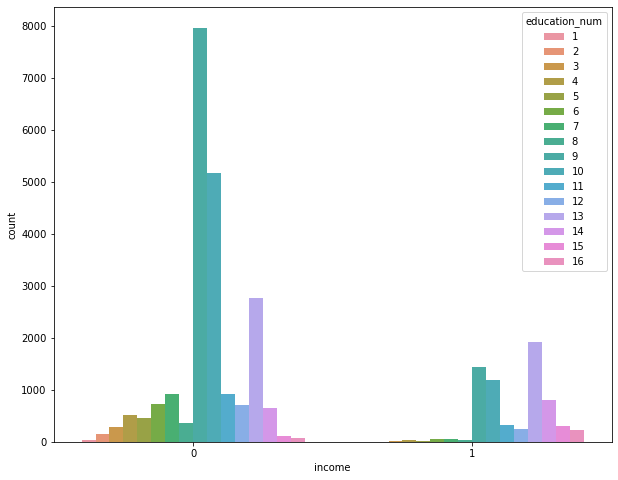

In [32]:
plt.figure(figsize=(10,8))

sns.countplot(x = 'income', hue = 'education_num', data = data)

This plot shows that the income group 1 ( >50k income) is dominated mostly by adults with  higher education numbers of {13,14,15,16}. While in income group 0 (<50k income), the adults associated with lower education numbers (12 or less) occupy the majority of the group. Thus, we can see that higher education level adults are likely to make more than 50k per year.

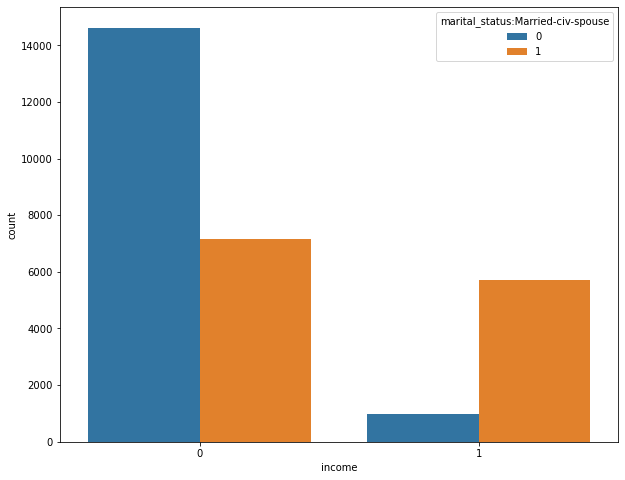

In [33]:
plt.figure(figsize=(10,8))

sns.countplot(x = 'income', hue = 'marital_status:Married-civ-spouse', data = data)

This plot shows that in the income group 1 ,there is significantly less adults who are not under this 'marital_status:Married-civ-spouse' and make >50k income while married adults are dominating this income group. On the other hand, in the income group 0, the adults who are not under this marital status outnumber the ones who have this status by almost twice as much. Thus we can see married adults are likely to make more than 50k per year.

Text(0.5, 0, 'income')

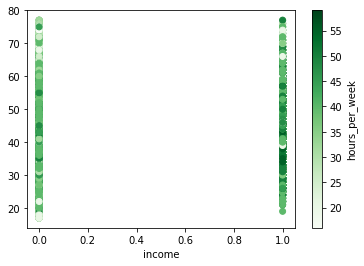

In [31]:
plt.scatter(data['income'],data['age'], c=data['hours_per_week'], cmap='Greens')
cbar=plt.colorbar()
cbar.set_label('hours_per_week')
plt.xlabel('income')


We create this special plot for features 'age' and 'hours_per_week' because they are continuous variables. By looking at the color and the density of the dots in both income group, we can see the dots are thicker and deeper colored in income group 1 than that in income group 0. Therefore, we can conclude that there are more older adults in income group 1 and more adults in this group work more hours than the adutls in income group 0. Thus, older 'age' and higher 'hours_per_week' adults are likely to make >50k income.

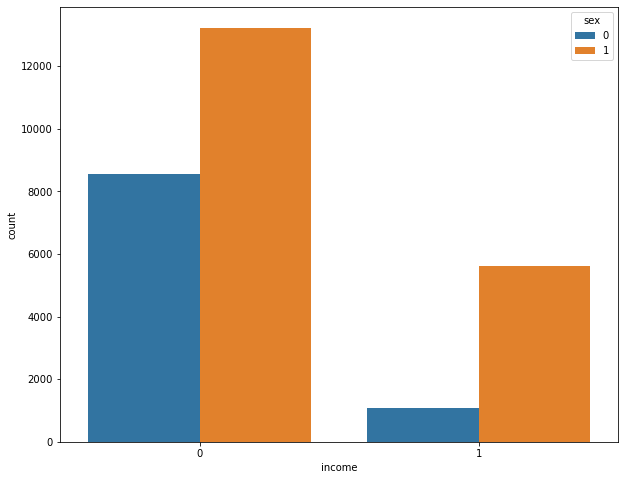

In [34]:
plt.figure(figsize=(10,8))

sns.countplot(x = 'income', hue = 'sex', data = data)

This plot shows that in the income group 1 (<50k), there is significantly less number of females than males. There are also noticeably more females in the income group 0 than in income group 1. Therefore, being a female is likely to be classified as <50k income. 

In [51]:
pd.crosstab(summary_table['Original Feature'], summary_table['Coefficients'] < 0.35)

Coefficients,False,True
Original Feature,,
age,1,0
education_num,1,0
hours_per_week,1,0
marital_status,1,6
native_country,0,2
occupation,0,14
race,0,5
relationship,0,6
sex,1,0


In summary,`age`, `education_num`, `hours_per_week`, `marital_status:Married-civ-spousek`, and `sex` are the important feature in this dataset. These are important because these are the attributes which help us a lot in predicting the income of an individual. The coefficients of these features are greater than all the others which is an indication that these attributes play important role in predicting whether an individual earn more or less than 50K.

It is also common sense that an individual with higher education (`education_num`) will earn more, an individual who works more hours per week (`hours_per_week`) will earn more, `age` is also a factor along with the marital status (`marital_status:Married-civ-spouse`).

### 4. Interpret Support Vectors

In this section, we will create SVM plots for some of our most importance features: age, education_num, martital_status, race, occupation to see how and why SVM choose the instances from each of these features in the proccess of classifying income groups.

In [277]:
svm_clf_rbf.support_

array([    7,     8,    20, ..., 22752, 22755, 22769])

In [278]:
svm_clf_rbf.n_support_

array([4518, 3997])

In [279]:
svm_clf_rbf.support_vectors_[0][0:]

array([ 0.37176699, -0.02298891,  0.71670136,  0.0543314 , -0.17584984,
       -0.26622225, -0.01325521,  0.54639342, -0.16909956, -0.26203603,
       -0.20693274, -0.02096109, -0.40429709, -0.0239009 ,  1.09845763,
       -0.114764  , -0.70508145, -0.18594828, -0.16744367,  2.6646426 ,
       -0.0114791 , -0.39118813, -0.37353122, -0.15951401, -0.21398752,
       -0.26829728, -0.33455193, -0.06369298, -0.46408221, -0.14406879,
       -0.34715374, -0.17425087, -0.22019846,  1.23318986, -0.58887982,
       -0.17756775, -0.42430804, -0.35708096, -0.22840642, -0.10079318,
       -0.1816067 , -0.33706201, -0.09294016,  0.42430804, -0.30886269,
        0.30886269])

In [292]:
df_tested_on = data.iloc[ytrain]

df_tested_on.reset_index(drop=True, inplace=True)
# df_tested_on.drop('Survived', axis=1, inplace=True)
df_tested_on.head()

C:\Users\LAYI\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,education_num,sex,hours_per_week,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,marital_status:Divorced,marital_status:Married-AF-spouse,marital_status:Married-civ-spouse,marital_status:Married-spouse-absent,marital_status:Never-married,marital_status:Separated,marital_status:Widowed,occupation:Adm-clerical,occupation:Armed-Forces,occupation:Craft-repair,occupation:Exec-managerial,occupation:Farming-fishing,occupation:Handlers-cleaners,occupation:Machine-op-inspct,occupation:Other-service,occupation:Priv-house-serv,occupation:Prof-specialty,occupation:Protective-serv,occupation:Sales,occupation:Tech-support,occupation:Transport-moving,relationship:Husband,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native_country:Others,native_country:United-States,income
0,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,54,4,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [293]:
df_support = df_tested_on.iloc[svm_clf_rbf.support_,:]
df_support.head()

,age,education_num,sex,hours_per_week,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,marital_status:Divorced,marital_status:Married-AF-spouse,marital_status:Married-civ-spouse,marital_status:Married-spouse-absent,marital_status:Never-married,marital_status:Separated,marital_status:Widowed,occupation:Adm-clerical,occupation:Armed-Forces,occupation:Craft-repair,occupation:Exec-managerial,occupation:Farming-fishing,occupation:Handlers-cleaners,occupation:Machine-op-inspct,occupation:Other-service,occupation:Priv-house-serv,occupation:Prof-specialty,occupation:Protective-serv,occupation:Sales,occupation:Tech-support,occupation:Transport-moving,relationship:Husband,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Amer-Indian-Eskimo,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native_country:Others,native_country:United-States,income
7,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
8,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
20,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
22,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
25,66,10,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [295]:
df_support.shape

(8515, 47)

In [354]:
len(df_support['age'].unique())

2

In [356]:
one_unique = []
more_unique = []
for i in df_support.columns:
#     print(df_support[i].unique())
    if len(df_support[i].unique()) == 1:
        one_unique.append(i)
    else:
        more_unique.append(i)

In [363]:
more_unique

['age',
 'education_num',
 'marital_status:Divorced',
 'marital_status:Widowed',
 'occupation:Machine-op-inspct',
 'occupation:Prof-specialty',
 'race:Black',
 'race:White']

In [314]:
df_support['income'] = y[svm_clf_rbf.support_] # add back in the 'Survived' Column to the pandas dataframe
# data['income'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8515 entries, 7 to 22769
Data columns (total 47 columns):
age                                     8515 non-null int64
education_num                           8515 non-null int64
sex                                     8515 non-null int64
hours_per_week                          8515 non-null int64
workclass:Federal-gov                   8515 non-null int64
workclass:Local-gov                     8515 non-null int64
workclass:Never-worked                  8515 non-null int64
workclass:Private                       8515 non-null int64
workclass:Self-emp-inc                  8515 non-null int64
workclass:Self-emp-not-inc              8515 non-null int64
workclass:State-gov                     8515 non-null int64
workclass:Without-pay                   8515 non-null int64
marital_status:Divorced                 8515 non-null int64
marital_status:Married-AF-spouse        8515 non-null int64
marital_status:Married-civ-spouse       8515 non-nul

C:\Users\LAYI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


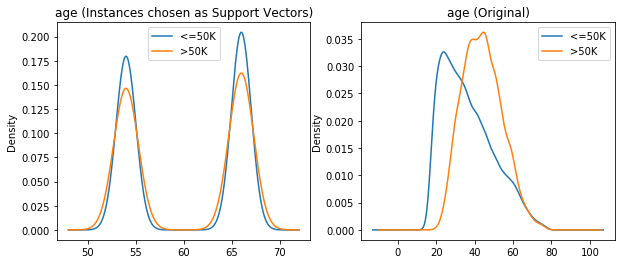

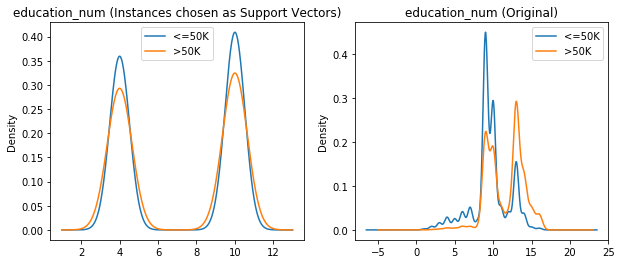

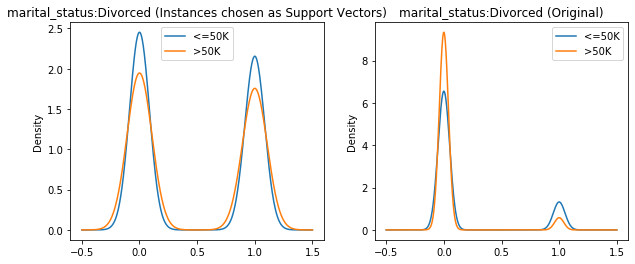

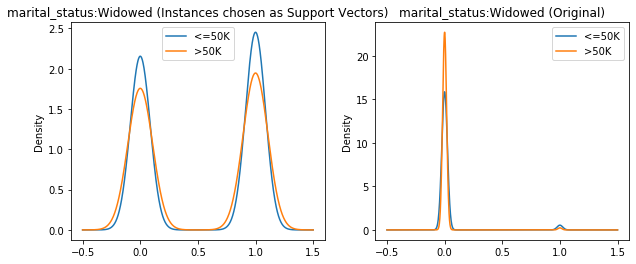

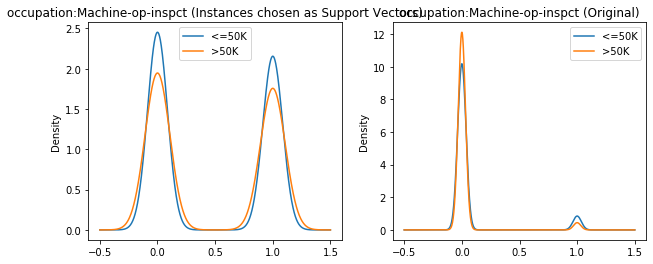

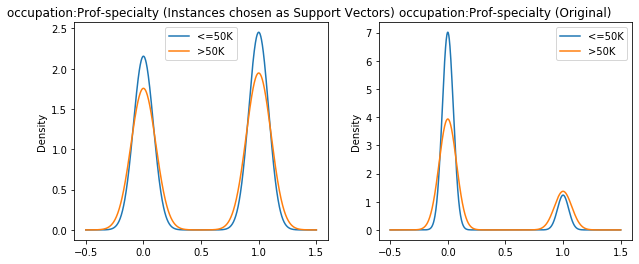

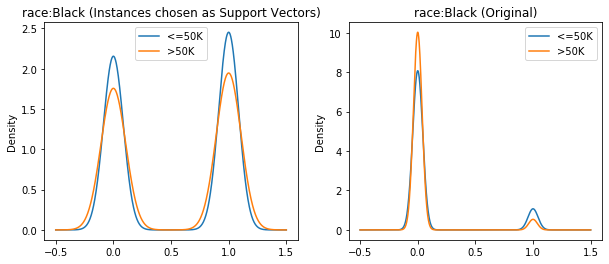

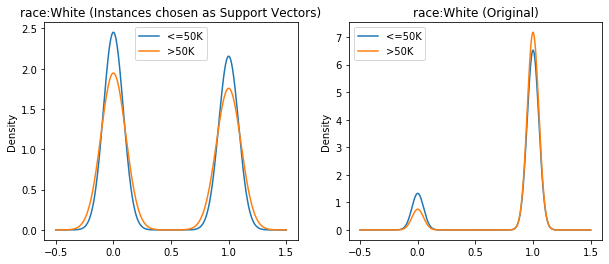

In [364]:
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby('income')
df_grouped = data.groupby('income')

# plot KDE of Different variables
vars_to_plot = more_unique

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

In feature 'age' plot, we can see there are some significant differences in ages around 54 and around 66 where income groups are clearly seperated.  
In feature 'education_num' plot, we also see that instances with education numbers around {3,4} and around {9,10} are significantly different for both income groups.  
In feature 'marital_status' (divorced and widowed) plots, it is evident to see the some big differences between income groups for both adults who has this status and who don't.  
In feature 'occupation', Machine-op-inspct and Prof-specialty are two professions chosen by SVM. They both show large differences for both income groups. However, it's worth noticing that in Machine-op-inspct, the difference in income groups at instances where adults who do not have this occupation is slightly higher than the difference at instances where adults with this occupation. While in Prof-specialty occupation, it's the opposite, in which adults with this occupation has a bigger sparity in income groups compared to adults without this occupation.  
In feature 'race', instances are chosen as support vectors show the clear differences in income groups for both black and non-black and white and non-white adults.



In [212]:
svm_clf_rbf.decision_function_shape

'ovr'

In [214]:
svm_clf_linear.coef_

array([[ 0.25164094,  0.62338061,  0.17754376,  0.28807166,  0.05295191,
        -0.00234462, -0.00789989,  0.01074977,  0.05317955, -0.05859999,
        -0.0343213 , -0.02058463, -0.11103402,  0.02873658,  0.38542929,
        -0.04234868, -0.28573044, -0.04939367, -0.03518287, -0.01355676,
        -0.00188355, -0.06885047,  0.20763539, -0.12027634, -0.08189725,
        -0.09679722, -0.17858824, -0.04397522,  0.12107827,  0.02654225,
         0.08424591,  0.09827722, -0.07954413,  0.04991645, -0.02442476,
        -0.02455488, -0.08328959, -0.05629198,  0.17626113, -0.04186804,
         0.01848287, -0.01251756, -0.0019105 ,  0.01360764, -0.01724508,
         0.01724508]])

In [216]:
print('w = ', svm_clf_linear.coef_)
print('\nb = ', svm_clf_linear.intercept_)
print('\nIndices of support vectors = ', svm_clf_linear.support_)
print('\nSupport vectors = ', svm_clf_linear.support_vectors_)
print('\nNumber of support vectors for each class = ', svm_clf_linear.n_support_)
print('\nCoefficients of the support vector in the decision function = ', np.abs(svm_clf_linear.dual_coef_))

w =  [[ 0.25164094  0.62338061  0.17754376  0.28807166  0.05295191 -0.00234462
  -0.00789989  0.01074977  0.05317955 -0.05859999 -0.0343213  -0.02058463
  -0.11103402  0.02873658  0.38542929 -0.04234868 -0.28573044 -0.04939367
  -0.03518287 -0.01355676 -0.00188355 -0.06885047  0.20763539 -0.12027634
  -0.08189725 -0.09679722 -0.17858824 -0.04397522  0.12107827  0.02654225
   0.08424591  0.09827722 -0.07954413  0.04991645 -0.02442476 -0.02455488
  -0.08328959 -0.05629198  0.17626113 -0.04186804  0.01848287 -0.01251756
  -0.0019105   0.01360764 -0.01724508  0.01724508]]

b =  [-1.48375543]

Indices of support vectors =  [    7     8    20 ... 22752 22755 22769]

Support vectors =  [[ 0.37176699 -0.02298891  0.71670136 ...  0.42430804 -0.30886269
   0.30886269]
 [ 0.75615793  1.16398925  0.71670136 ... -2.35677834  3.23768468
  -3.23768468]
 [-0.62764947 -0.02298891  0.71670136 ...  0.42430804 -0.30886269
   0.30886269]
 ...
 [ 1.14054888  2.35096741 -1.39528129 ...  0.42430804 -0.3088626

In conclusion, as we can see from the density plots, we compare the instances with the support vectors with the original data and we can see that in almost every case that instances chosen by SVM have better separation in the distributions between the income groups than the original data.  The only variables that have separations of distributions in the original data that seem to match their corresponding support vectors are race:white and race:black. In conclusion, this shows that the instances on the edges of their class boundaries or somtimes overlapped can cause misclassification in our models.